In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
june = pd.read_csv("data/june.csv")
june = june[june['Description'] == "Exit"][["Time", "Entry Location/ Bus Route", "Exit Location"]]
june.reset_index(inplace=True)
june.drop(labels='index', axis=1, inplace=True)

june.head()

,Time,Entry Location/ Bus Route,Exit Location
0,06/03/19 08:16 AM,Ballston,Metro Center E
1,06/03/19 07:41 PM,Metro Center W,Ballston
2,06/04/19 05:32 PM,Suitland,Ballston
3,06/05/19 07:46 PM,Suitland,Ballston
4,06/06/19 08:52 AM,Ballston,Suitland


In [3]:
lines_file = "data/Metro_Lines_Regional/Metro_Lines_Regional.shp"
lines = gpd.read_file(lines_file)
lines.head()

,OBJECTID,GIS_ID,NAME,WEB_URL,SHAPE_Leng,geometry
0,1,Metro_004,red,http://wmata.com/rail/maps/map.cfm,50744.507908,LINESTRING (-77.05432329994883 39.062328814831...
1,2,Metro_005,yellow,http://wmata.com/rail/maps/map.cfm,24251.213169,LINESTRING (-77.0755053001467 38.7930197613305...
2,3,Metro_003,orange,http://wmata.com/rail/maps/map.cfm,42532.313651,LINESTRING (-77.27351235734193 38.877457776135...
3,4,Metro_002,green,http://wmata.com/rail/maps/map.cfm,37092.457024,LINESTRING (-76.91065124681623 39.011805607604...
4,5,Metro_001,blue,http://wmata.com/rail/maps/map.cfm,48797.904484,(LINESTRING (-77.16867932056043 38.76627975573...


In [4]:
stations_file = "data/Metro_Stations_Regional/Metro_Stations_Regional.shp"
stations = gpd.read_file(stations_file)
stations.head()

,OBJECTID,GIS_ID,NAME,WEB_URL,ADDRESS,LINE,TRAININFO_,geometry
0,1,mstn_57,Archives-Navy Mem'l,https://www.wmata.com/rider-guide/stations/arc...,"701 PENNSYLVANIA AVENUE NW, WASHINGTON, DC","green, yellow",https://www.wmata.com/js/nexttrain/nexttrain.h...,POINT (-77.02191667797454 38.89367300870342)
1,2,mstn_58,Waterfront,https://www.wmata.com/rider-guide/stations/wat...,"399 M STREET SW, WASHINGTON, DC",green,https://www.wmata.com/js/nexttrain/nexttrain.h...,POINT (-77.01750749635643 38.87646964877142)
2,3,mstn_59,Ronald Reagan Washington National Airport,https://www.wmata.com/rider-guide/stations/nat...,"2400 S. SMITH BLVD., ARLINGTON, VA","blue, yellow",https://www.wmata.com/js/nexttrain/nexttrain.h...,POINT (-77.04404458879256 38.85342416222645)
3,4,mstn_60,Van Dorn Street,https://www.wmata.com/rider-guide/stations/van...,"5690 EISENHOWER AVENUE, ALEXANDRIA, VA","blue, yellow",https://www.wmata.com/js/nexttrain/nexttrain.h...,POINT (-77.12911384128539 38.79931543415589)
4,5,mstn_61,Franconia-Springfield,https://www.wmata.com/rider-guide/stations/fra...,"6880 FRONTIER DRIVE, SPRINGFIELD, VA","blue, yellow",https://www.wmata.com/js/nexttrain/nexttrain.h...,POINT (-77.16797250809294 38.76652964675338)


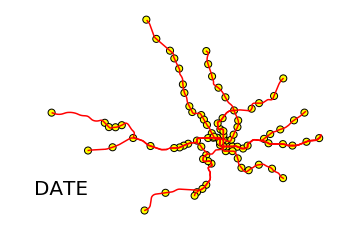

In [5]:
stations = stations.to_crs(lines.crs)
base = lines.plot(color='red', edgecolor='black')


values = np.ones(len(stations)) * 50

stations.plot(ax=base, marker='o', color='yellow', edgecolor='black', markersize=values)
base.axis('off')
base.annotate("DATE",
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
plt.show()

In [6]:
filepath = os.path.join('charts/', str(0)+'.jpg')
chart = base.get_figure()
chart.savefig(filepath, dpi=300)

In [7]:
june.head()

,Time,Entry Location/ Bus Route,Exit Location
0,06/03/19 08:16 AM,Ballston,Metro Center E
1,06/03/19 07:41 PM,Metro Center W,Ballston
2,06/04/19 05:32 PM,Suitland,Ballston
3,06/05/19 07:46 PM,Suitland,Ballston
4,06/06/19 08:52 AM,Ballston,Suitland


In [8]:
def gif_maker(wmata):
    output_path = 'charts/' 
    
    for ride in range(wmata.shape[0]):
        current = wmata.iloc[ride]
        
        #Entry
        stations = stations.to_crs(lines.crs)
        base = lines.plot(color='red', edgecolor='black')


        values = np.ones(len(stations)) * 50

        stations.plot(ax=base, marker='o', color='yellow', edgecolor='black', markersize=values)
        base.axis('off')
        base.annotate(current['Time'],
                    xy=(0.1, .225), xycoords='figure fraction',
                    horizontalalignment='left', verticalalignment='top',
                    fontsize=20)
    
    
        filepath = os.path.join(output_path, str(ride)+'a.jpg')
        chart = fig.get_figure()
        chart.savefig(filepath, dpi=300)
        
        #Exit
        stations = stations.to_crs(lines.crs)
        base = lines.plot(color='red', edgecolor='black')


        values = np.ones(len(stations)) * 50

        stations.plot(ax=base, marker='o', color='yellow', edgecolor='black', markersize=values)
        base.axis('off')
        base.annotate(current['Time'],
                    xy=(0.1, .225), xycoords='figure fraction',
                    horizontalalignment='left', verticalalignment='top',
                    fontsize=20)
    
    
        filepath = os.path.join(output_path, str(ride)+'b.jpg')
        chart = fig.get_figure()
        chart.savefig(filepath, dpi=300)

In [47]:
#TODO 
# Names in Stations File Dont Match WMATA File
# Actual Loop